In [4]:
import os, sys
import numpy as np
import pandas as pd
from tqdm import tqdm
import csv, re

In [2]:
def read_txt_files(path="datasets/training"):
    datasets = []
    flist = []
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith(".txt"):
                flist.append(os.path.join(root, file))
    meta_file_path = os.path.join(path,'imfdb_meta.csv')
    with open(meta_file_path, mode='w') as csv_file:
        fieldnames = ['path','gender','emotion','obstruction','illumination','orientation']
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        writer.writeheader()
        for f in tqdm(flist):
            with open(f) as txt:
                x = list(filter(None, txt.read().split('\n')))
                for xs in x:
                    line = np.array(re.split("\t|\s",xs))
                    if len(line)>16 :
                        file_path = "/".join(f.split('/')[:-1]) + "/images/" + line[2]
                        row_dict = {fieldnames[0]:file_path,fieldnames[1]:line[10],fieldnames[2]:line[11],fieldnames[3]:line[12],fieldnames[4]:line[13],fieldnames[5]:line[15]}
                        writer.writerow(row_dict)


    return meta_file_path

meta_data_path = read_txt_files(path = "datasets/IMFDB_final")

100%|██████████| 399/399 [00:00<00:00, 593.25it/s]


In [3]:
df = pd.read_csv(meta_data_path)

In [4]:
df.describe()

,path,gender,emotion,obstruction,illumination,orientation
count,31292,30995,31268,31289,31290,31292
unique,30215,9,11,17,14,10
top,datasets/IMFDB_final/KatrinaKaif/ZindagiNaMile...,MALE,NEUTRAL,NONE,MEDIUM,FRONTAL
freq,235,20986,9588,21111,19836,11971


In [5]:
print(df.gender.unique(),df.emotion.unique(),df.obstruction.unique(),df.illumination.unique(),df.orientation.unique())

['FEMALE' 'MALE' 'SalmanKhan' nan 'Kavya_Madhavan' '174' 'Bharathi'
 'Prakash' 'KareenaKapoor' '2001'] ['ANGER' 'NEUTRAL' 'SURPRISE' 'HAPPINESS' 'SADNESS' 'FEAR' 'DISGUST'
 'MALE' nan 'FEMALE' 'Cheli' 'KareenaKapoor'] ['NONE' 'GLASSES' 'HAND' 'HAIR' 'OTHERS' 'DISGUST' 'MALE' 'HAPPINESS'
 'NEUTRAL' 'ANGER' 'BEARD' 'ORNAMENTS' 'SADNESS' 'SURPRISE' nan '2001'
 'FEAR' 'FEMALE'] ['MEDIUM' 'BAD' 'HIGH' 'NONE' 'NEUTRAL' 'HAND' 'OTHERS' 'GLASSES' 'ANGER'
 'DISGUST' 'HAPPINESS' 'ORNAMENTS' nan 'Madhavan' 'HAIR'] ['FRONTAL' 'UP' 'RIGHT' 'LEFT' 'DOWN' 'YOUNG' 'MEDIUM' 'ANGER' 'OLD'
 'MIDDLE']


In [6]:
df.groupby('gender')['path'].nunique()

gender
174                   1
2001                  1
Bharathi            225
FEMALE             9114
KareenaKapoor       191
Kavya_Madhavan       63
MALE              20383
Prakash              17
SalmanKhan           25
Name: path, dtype: int64

In [7]:
df.groupby('emotion')['path'].nunique()

emotion
ANGER            2697
Cheli               1
DISGUST          3736
FEAR              610
FEMALE            480
HAPPINESS        7846
KareenaKapoor       1
MALE              215
NEUTRAL          9417
SADNESS          3583
SURPRISE         1690
Name: path, dtype: int64

In [8]:
for col in ['emotion','gender','obstruction']:
    threshold = 500
    value_counts = df[col].value_counts()
    to_remove = value_counts[value_counts <= threshold].index
    df[col].replace(to_remove, None, inplace=True)

value_counts = df.path.value_counts()
to_remove = value_counts[value_counts >10].index
df.path.replace(to_remove, np.nan, inplace=True)

In [9]:
print(df.gender.unique(),df.emotion.unique(),df.obstruction.unique(),df.illumination.unique(),df.orientation.unique())

['FEMALE' 'MALE' nan] ['ANGER' 'NEUTRAL' 'SURPRISE' 'HAPPINESS' 'SADNESS' 'FEAR' 'DISGUST' nan] ['NONE' 'GLASSES' 'HAND' 'HAIR' 'OTHERS' 'BEARD' nan] ['MEDIUM' 'BAD' 'HIGH' 'NONE' 'NEUTRAL' 'HAND' 'OTHERS' 'GLASSES' 'ANGER'
 'DISGUST' 'HAPPINESS' 'ORNAMENTS' nan 'Madhavan' 'HAIR'] ['FRONTAL' 'UP' 'RIGHT' 'LEFT' 'DOWN' 'YOUNG' 'MEDIUM' 'ANGER' 'OLD'
 'MIDDLE']


In [10]:
clean_df = df.dropna()

In [11]:
print(clean_df.gender.unique(),clean_df.emotion.unique(),clean_df.obstruction.unique(),clean_df.illumination.unique(),clean_df.orientation.unique())

['FEMALE' 'MALE'] ['ANGER' 'NEUTRAL' 'SURPRISE' 'HAPPINESS' 'SADNESS' 'FEAR' 'DISGUST'] ['NONE' 'GLASSES' 'HAND' 'HAIR' 'OTHERS' 'BEARD'] ['MEDIUM' 'BAD' 'HIGH' 'NONE' 'ORNAMENTS' 'HAND' 'Madhavan' 'HAIR'
 'GLASSES' 'OTHERS' 'DISGUST'] ['FRONTAL' 'UP' 'RIGHT' 'LEFT' 'DOWN' 'YOUNG' 'ANGER' 'OLD' 'MEDIUM']


In [12]:
clean_df.describe()

,path,gender,emotion,obstruction,illumination,orientation
count,30092,30092,30092,30092,30092,30092
unique,29980,2,7,6,11,9
top,datasets/IMFDB_final/BomanIrani/JolyLLB/images...,MALE,NEUTRAL,NONE,MEDIUM,FRONTAL
freq,8,20535,9665,21314,19207,11555


In [13]:
len(clean_df.path.str.contains('.jpg'))

30092

In [14]:
convert_dict = {}
for col in clean_df.columns[1:]:
    print(col)
    convert_dict[col] = []
    for i,v in enumerate(clean_df[col].unique()):
        convert_dict[col].append((i,v))
        clean_df[col].replace(v, i, inplace=True)
print(convert_dict)

gender
emotion
obstruction
illumination
orientation
{'gender': [(0, 'FEMALE'), (1, 'MALE')], 'emotion': [(0, 'ANGER'), (1, 'NEUTRAL'), (2, 'SURPRISE'), (3, 'HAPPINESS'), (4, 'SADNESS'), (5, 'FEAR'), (6, 'DISGUST')], 'obstruction': [(0, 'NONE'), (1, 'GLASSES'), (2, 'HAND'), (3, 'HAIR'), (4, 'OTHERS'), (5, 'BEARD')], 'illumination': [(0, 'MEDIUM'), (1, 'BAD'), (2, 'HIGH'), (3, 'NONE'), (4, 'ORNAMENTS'), (5, 'HAND'), (6, 'Madhavan'), (7, 'HAIR'), (8, 'GLASSES'), (9, 'OTHERS'), (10, 'DISGUST')], 'orientation': [(0, 'FRONTAL'), (1, 'UP'), (2, 'RIGHT'), (3, 'LEFT'), (4, 'DOWN'), (5, 'YOUNG'), (6, 'ANGER'), (7, 'OLD'), (8, 'MEDIUM')]}


In [15]:
clean_df.describe()

,gender,emotion,obstruction,illumination,orientation
count,30092.000000,30092.000000,30092.000000,30092.000000,30092.000000
mean,0.682407,2.566928,0.645188,0.459159,1.639273
std,0.465548,1.811111,1.247198,0.751696,1.457920
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,3.000000,0.000000,0.000000,2.000000
75%,1.000000,4.000000,1.000000,1.000000,3.000000
max,1.000000,6.000000,5.000000,10.000000,8.000000


In [16]:
clean_df.columns.values

array(['path', 'gender', 'emotion', 'obstruction', 'illumination',
       'orientation'], dtype=object)

In [18]:
clean_df.to_pickle("./imfdb_meta.pkl")

### Check the dataset, rescaling and image augmentation

path            datasets/IMFDB_final/RamyaKrishna/HelloBrother...
gender                                                          0
emotion                                                         3
obstruction                                                     4
illumination                                                    2
orientation                                                     0
Name: 22088, dtype: object


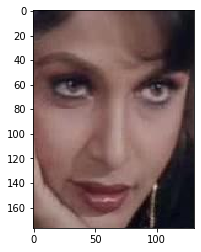

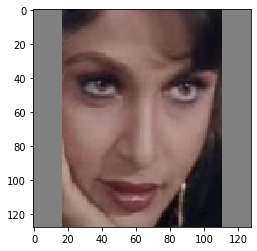

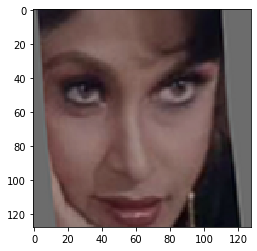

In [51]:
from PIL import Image
import emotion_gender_age_model as ega
import matplotlib.pyplot as plt

%matplotlib inline

# split data into train, validation and test datasets in pandas
df = pd.read_pickle("./imfdb_meta.pkl")
train_test_mask = np.random.rand(len(df)) < 0.8
train_valid_df = df[train_test_mask]
test_df = df[~train_test_mask]

train_validation_mask = np.random.rand(len(train_valid_df)) < 0.7
train_df = train_valid_df[train_validation_mask]
valid_df = train_valid_df[~train_validation_mask]

batch_size = 16; image_size = 128
n_classes={'emotion':7,'age':101,'gender':2}


augmentor = ega.get_transform_func()

sample_id = np.random.randint(train_df.shape[0])

row_in_df = train_df.iloc[sample_id,:]
print(row_in_df)
image = Image.open(row_in_df.path)
rescaled_image = ega.rescale_image(image=image,input_shape=(image_size,image_size))
augmented_image = augmentor(rescaled_image)

plt.figure(1)
plt.imshow(np.asarray(image))
plt.figure(2)
plt.imshow(np.asarray(rescaled_image))
plt.figure(3)
plt.imshow(np.asarray(augmented_image))
plt.show()



### Train on the imfdb dataset

In [38]:
import emotion_gender_age_model as ega

# split data into train, validation and test datasets in pandas
df = pd.read_pickle("./imfdb_meta.pkl")
train_test_mask = np.random.rand(len(df)) < 0.8
train_valid_df = df[train_test_mask]
test_df = df[~train_test_mask]

train_validation_mask = np.random.rand(len(train_valid_df)) < 0.7
train_df = train_valid_df[train_validation_mask]
valid_df = train_valid_df[~train_validation_mask]

batch_size = 16; image_size = 128
n_classes={'emotion':7,'age':101,'gender':2}
print(n_classes)
train_gen = ega.DataGenerator(train_df,batch_size=batch_size,image_size=image_size,augment=True, n_classes=n_classes )
validation_gen = ega.DataGenerator(valid_df,batch_size=batch_size,image_size=image_size,augment=True, n_classes=n_classes )

model = ega.get_model(train_gen,non_trainable_blocks=['bolck1','bolck2','bolck3','bolck4','bolck5''bolck9'])

ega.train_model(model,train_gen, validation_gen,epochs=10,steps=10000)



loss.
=> epoch 1  step 26  train_loss: 4.184253
=> epoch 1  step 27  train_loss: 3.321576
=> epoch 1  step 28  train_loss: 3.729880
=> epoch 1  step 29  train_loss: 3.570781
=> epoch 1  step 30  train_loss: 3.574816
=> epoch 1  step 31  train_loss: 3.444669
=> epoch 1  step 32  train_loss: 3.626772
=> epoch 1  step 33  train_loss: 4.649420
=> epoch 1  step 34  train_loss: 3.134081
=> epoch 1  step 35  train_loss: 3.890378
=> epoch 1  step 36  train_loss: 4.128074
=> epoch 1  step 37  train_loss: 4.070569
=> epoch 1  step 38  train_loss: 3.750401
=> epoch 1  step 39  train_loss: 3.971859
=> epoch 1  step 40  train_loss: 4.036274
=> epoch 1  step 41  train_loss: 3.898089
=> epoch 1  step 42  train_loss: 3.898431
=> epoch 1  step 43  train_loss: 4.057317
=> epoch 1  step 44  train_loss: 3.994990
=> epoch 1  step 45  train_loss: 3.731837
=> epoch 1  step 46  train_loss: 3.815084
=> epoch 1  step 47  train_loss: 4.207113
=> epoch 1  step 48  train_loss: 4.191796
=> epoch 1  step 49  train_l

KeyboardInterrupt: 

### test the trained model

In [35]:
import tensorflow as tf
import numpy as np
import pandas as pd
import emotion_gender_age_model as ega
image_size = 128
n_classes={'emotion':7,'age':101,'gender':2}
image_shape = (image_size, image_size, 3)
image_input = tf.keras.layers.Input(shape=image_shape)
model = ega.create_model(image_input, n_classes=n_classes)
# model = ega.set_non_trainable(model,block_ids=['block9'])
fake_data = np.ones(shape=[5, image_size,image_size, 3]).astype(np.float32)
model(fake_data) # initialize model to load weights
model.load_weights("./checkpoints/run3/EGA_epoch_35_score_55.h5")

# model = ega.load_model("checkpoints/run3/EGA_epoch_32_score_56.model")







In [38]:
from PIL import Image
import matplotlib.pyplot as plt
df = pd.read_pickle("./imfdb_meta.pkl")
train_test_mask = np.random.rand(len(df)) < 0.8
train_valid_df = df[train_test_mask]
test_df = df[~train_test_mask]

train_validation_mask = np.random.rand(len(train_valid_df)) < 0.7
train_df = train_valid_df[train_validation_mask]
valid_df = train_valid_df[~train_validation_mask]

augmentor = ega.get_transform_func()
batch_size = 10
sample_ids = np.random.randint(train_df.shape[0],size=batch_size)
image_data =  np.zeros((batch_size, image_size, image_size, 3), dtype=np.float)
for i, sample_id in enumerate(sample_ids):
    row_in_df = train_df.iloc[sample_id,:]
    print(row_in_df)
    image = Image.open(row_in_df.path)
    rescaled_image = ega.rescale_image(image=image,input_shape=(image_size,image_size))
    augmented_image = augmentor(rescaled_image)
    image_data[i] = np.array(rescaled_image,dtype=float)/255.
pred_y_e, pred_y_g, pred_y_a = model(image_data)

print(np.argmax(pred_y_g.numpy(),axis=-1), np.argmax(pred_y_e.numpy(),axis=-1))

path            datasets/IMFDB_final/KarunaBenerjee/pather/ima...
gender                                                          0
emotion                                                         1
obstruction                                                     0
illumination                                                    0
orientation                                                     0
Name: 17960, dtype: object
path            datasets/IMFDB_final/Savithri/Missamma/images/...
gender                                                          0
emotion                                                         3
obstruction                                                     0
illumination                                                    2
orientation                                                     0
Name: 15510, dtype: object


FileNotFoundError: [Errno 2] No such file or directory: 'datasets/IMFDB_final/Savithri/Missamma/images/Savithri_151.jpg'

In [22]:
train_df.loc[5213,:]

path            datasets/IMFDB_final/M.S.Narayana/Sardukupodam...
gender                                                          1
emotion                                                         6
obstruction                                                     0
illumination                                                    0
orientation                                                     0
Name: 5213, dtype: object

### Extract meta_data.mat file IMDB-WIKI face age-gender dataset

In [ ]:
from scipy.io import loadmat
from datetime import datetime
import os


def calc_age(taken, dob):
    birth = datetime.fromordinal(max(int(dob) - 366, 1))

    # assume the photo was taken in the middle of the year
    if birth.month < 7:
        return taken - birth.year
    else:
        return taken - birth.year - 1


def get_meta(mat_path, db):
    meta = loadmat(mat_path)
    full_path = meta[db][0, 0]["full_path"][0]
    dob = meta[db][0, 0]["dob"][0]  # Matlab serial date number
    gender = meta[db][0, 0]["gender"][0]
    photo_taken = meta[db][0, 0]["photo_taken"][0]  # year
    face_score = meta[db][0, 0]["face_score"][0]
    second_face_score = meta[db][0, 0]["second_face_score"][0]
    age = [calc_age(photo_taken[i], dob[i]) for i in range(len(dob))]

    return full_path, dob, gender, photo_taken, face_score, second_face_score, age

db = "wiki"
# db = "imdb"
mat_path = "datasets/wiki"
full_path, dob, gender, photo_taken, face_score, second_face_score, age\
    = get_meta(mat_path, db)

In [1]:
"checkpoints/EGA_epoch_%d_score_%f.model",(12, 1.13)

('checkpoints/EGA_epoch_%d_score_%f.model', (12, 1.13))